In [1]:
import  pandas as pd 
import  numpy as np
import  matplotlib.pyplot as plt
import  seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

Q1.1.1

In [2]:
df = pd.read_csv('Pottery.csv')
df.head()

,Unnamed: 0,Site,Al,Fe,Mg,Ca,Na
0,1,Llanedyrn,14.4,7.00,4.30,0.15,0.51
1,2,Llanedyrn,13.8,7.08,3.43,0.12,0.17
2,3,Llanedyrn,14.6,7.09,3.88,0.13,0.20
3,4,Llanedyrn,11.5,6.37,5.64,0.16,0.14
4,5,Llanedyrn,13.8,7.06,5.34,0.20,0.20


In [3]:
len(df.columns)
print("I have", '7 columns.')

I have 7 columns.


The first 2 columns are identifiers, I will use columns 'AI', 'Fe', 'Mg', 'Ca' and 'Na' in PCA.

Q1.1.2

## Data pre-processing

In [4]:
# drop columns
pottery_df = df.drop(columns = ['Unnamed: 0', 'Site'])
pottery_df.head()

,Al,Fe,Mg,Ca,Na
0,14.4,7.00,4.30,0.15,0.51
1,13.8,7.08,3.43,0.12,0.17
2,14.6,7.09,3.88,0.13,0.20
3,11.5,6.37,5.64,0.16,0.14
4,13.8,7.06,5.34,0.20,0.20


/Users/houze/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

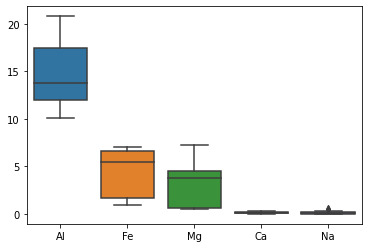

In [5]:
sns.boxplot(data = pottery_df)

<AxesSubplot:ylabel='Density'>

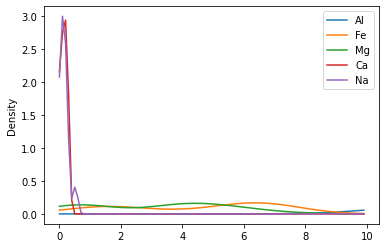

In [6]:
pottery_df.plot.kde(ind=np.arange(0,10,0.1))

In [7]:
# standardize data(zero mean-unit std)
scaler = StandardScaler()
scaler

StandardScaler()

In [8]:
pottery_scaled = scaler.fit_transform(pottery_df)
pottery_scaled

array([[-0.03145568,  1.07166989,  0.54199637,  0.03487194,  2.64999905],
       [-0.23591756,  1.1055258 ,  0.13495926, -0.26735151,  0.08698028],
       [ 0.03669829,  1.10975779,  0.3454957 , -0.16661036,  0.31312899],
       [-1.01968814,  0.80505457,  1.1689271 ,  0.13561308, -0.13916844],
       [-0.23591756,  1.09706182,  1.02856948,  0.53857767,  0.31312899],
       [-1.22415003,  0.75850268,  0.15367361,  0.23635423,  0.4638948 ],
       [-1.49676588, -0.08789516,  0.52328202,  0.53857767,  0.16236318],
       [-0.98561116,  0.5553672 ,  1.29524897,  0.33709538,  0.01159737],
       [-1.15599607,  0.43263951,  0.6449253 ,  1.44524799,  1.06695804],
       [-0.37222549,  1.03781397,  1.91282252,  1.34450685,  0.31312899],
       [-0.71299531,  0.70348682,  1.19232004,  0.74005996,  2.87614776],
       [-0.47445644,  0.91931828,  1.10810547,  1.64673029,  0.61466061],
       [-0.61076436,  0.94047822,  0.61217519,  0.53857767,  0.4638948 ],
       [-0.67891832,  0.83467849,  0.3

In [9]:
# confirm every column of the numpy has 0 mean and 1 std
pottery_scaled.mean(axis = 0)

array([5.12410627e-17, 1.70803542e-17, 4.27008856e-17, 3.84307970e-17,
       5.97812398e-17])

In [10]:
pottery_scaled.std(axis = 0)

array([1., 1., 1., 1., 1.])

In [11]:
pca = PCA(n_components=3, svd_solver = 'full') # post-processing with 3 PCs

In [12]:
pca_scores = pca.fit_transform(pottery_scaled)

In [13]:
scores_pd = pd.DataFrame(data=pca_scores, columns = ['PC1', 'PC2', 'PC3'], index = pottery_df.index)
scores_pd

,PC1,PC2,PC3
0,-1.778026,2.289445,-0.075289
1,-0.611193,0.122065,-0.499044
2,-0.722428,0.370209,-0.207550
3,-1.417696,-0.555600,-0.557590
4,-1.486801,-0.004081,0.195248
5,-1.259044,-0.092347,-0.783259
6,-1.180703,-0.607921,-0.575010
7,-1.490385,-0.498745,-0.336582
8,-2.076010,0.000500,0.220714
9,-2.311320,-0.376341,0.800851


In [14]:
loadings_pd = pd.DataFrame(data = pca.components_.T, columns = ['PC1', 'PC2', 'PC3'], index = pottery_df.columns)
loadings_pd

,PC1,PC2,PC3
Al,0.445434,0.356524,0.694985
Fe,-0.478132,0.041175,-0.157338
Mg,-0.486541,-0.049607,0.158560
Ca,-0.449054,-0.344146,0.683443
Na,-0.366888,0.866197,0.002043


Q1.2.3

In [15]:
pca.explained_variance_ratio_

array([0.7755594 , 0.12176197, 0.04883844])

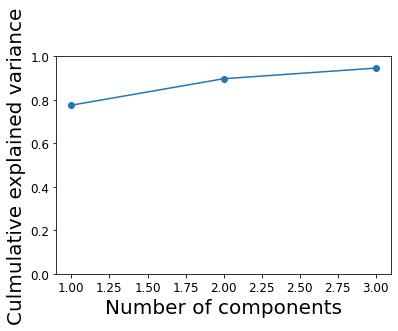

In [16]:
plt.plot(range(1, pca.n_components+1), np.cumsum(pca.explained_variance_ratio_), '-o', label = 'Cumulative explained variance')
plt.xlabel('Number of components', fontsize = 20)
plt.ylabel('Culmulative explained variance', fontsize = 20)
plt.tick_params(labelsize=12)
plt.ylim(0,1)
plt.show()

In [17]:
print('The first 2 components describe', np.cumsum(pca.explained_variance_ratio_)[1]*100, 'percent variances')
print('3 components describe', np.cumsum(pca.explained_variance_ratio_)[2]*100, 'percent variances')

The first 2 components describe 89.73213663789889 percent variances
3 components describe 94.61598027980749 percent variances


Q1.1.4

In [18]:
index_Llanedyrn = list(df.loc[df['Site'] == 'Llanedyrn'].index)
index_Caldicot = list(df.loc[df['Site'] == 'Caldicot'].index)
index_IsleThorns = list(df.loc[df['Site'] == 'IsleThorns'].index)
index_AshleyRails = list(df.loc[df['Site'] == 'AshleyRails'].index)

In [19]:
# scores_loadings graph for PC1-PC2
def myplot(scores,loadings,loading_labels=None,score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    n = loadings.shape[0]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    
    #plt.scatter(xs * scalex,ys * scaley, s=10)
    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T,score_labels):
        if label in index_Llanedyrn:
            plt.text(x, y, label, ha='center', color = 'g', size=11)
        elif label in index_Caldicot:
            plt.text(x, y, label, ha='center', color = 'b', size=11)
        elif label in index_IsleThorns:
            plt.text(x, y, label, ha='center', color = 'y', size=11)
        else:
            plt.text(x, y, label, ha='center', color = 'r', size=11)
    
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

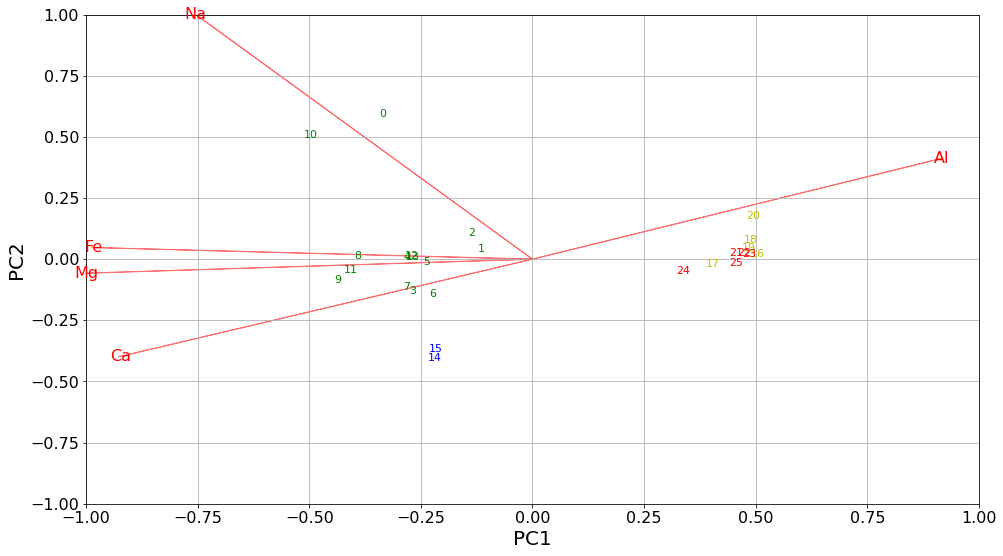

In [20]:
plt.rcParams["figure.figsize"] = [16,9]
myplot(pca_scores[:,:2],loadings_pd.iloc[:,:2],loading_labels=loadings_pd.index,score_labels=scores_pd.index)
plt.show() # visualize in different site


Q1.1.5

From above scores-loading graph, we could conclude the raw material from Isle Thorns and Ashley Rails which are denoted as red numbers and yellow numbers respectively to manufacture Product B are similar to each other since the observation points are close to each other. Raw materials are mainly from Al. However, product A needs very different components as we could tell from those green points and blue points. In this case, our company use raw materials from Caldicot for product B.

Q1.1.6

No. The raw materials from Caldicot are not as close as raw materials from Llanedyrn to 'Na', 'Fe', 'Mg' and 'Ca'. They have different raw materials for product A.

Q1.1.7

The biggest differences in the 2 big clusters are product B needs more Al for the raw material and product A needs less AI. Two samples from the candidate Caldiot and Llandyrn need the nearly the same amount of 'Ca' and 'AI'. However, samples from Llanedyrn need more 'Na', 'Fe' and 'Mg'.

Q1.1.8

Text(0.5, 1.0, 'Na')

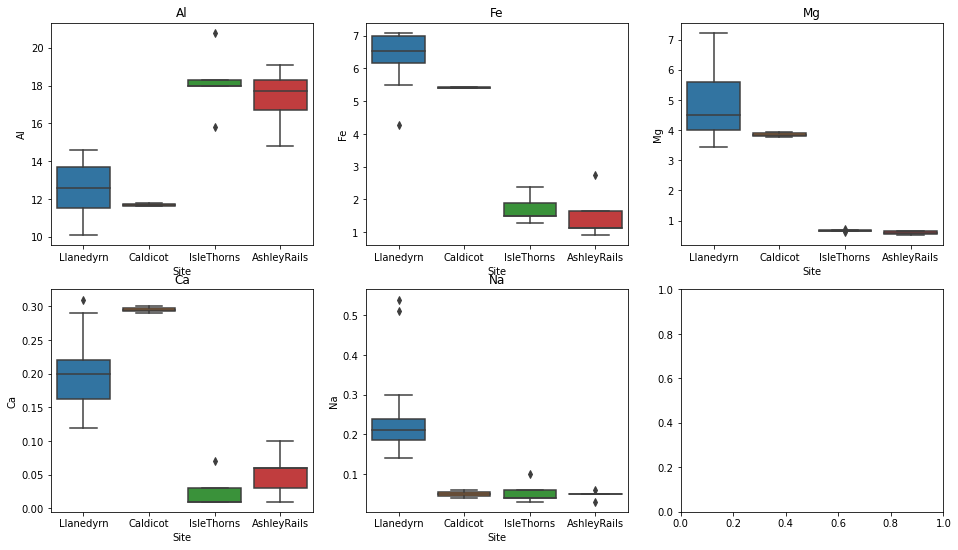

In [21]:
pottery_col = list(pottery_df.columns)
pottery_df['Site'] = df['Site']
fig, axes = plt.subplots(2, 3)
sns.boxplot(x= 'Site', y = 'Al', data=pottery_df, orient='v' , ax=axes[0, 0]).axes.set_title("Al")
sns.boxplot(x= 'Site', y = 'Fe', data=pottery_df, orient='v' , ax=axes[0, 1]).axes.set_title("Fe")
sns.boxplot(x= 'Site', y = 'Mg', data=pottery_df, orient='v' , ax=axes[0, 2]).axes.set_title("Mg")
sns.boxplot(x= 'Site', y = 'Ca', data=pottery_df, orient='v' , ax=axes[1, 0]).axes.set_title("Ca")
sns.boxplot(x= 'Site', y = 'Na', data=pottery_df, orient='v' , ax=axes[1, 1]).axes.set_title("Na")